In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import cross_val_score

In [13]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v3.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,11.0,2.0,36.0,1.0,1.0,1.0,2.0,0.0,3.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
1,11.0,1.0,54.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
2,11.0,1.0,51.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
3,11.0,2.0,24.0,4.0,1.0,1.0,2.0,0.0,4.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
4,11.0,1.0,65.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0


In [14]:
# Padronização do dataset (média e desvio padrão, valores entre -1 e 1)

defaut_df = (df - df.mean()) / df.std()
defaut_df

,UF,Sexo,Idade,Cor da pele,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,...,Motivo não visita pela depressão,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Idade diagnóstico de depressão,Diagnóstico de alcoolismo,Diagnóstico de depressão
0,-1.820040,0.721360,-0.818803,-1.035448,-0.775740,-0.636859,0.947754,-0.239913,0.848342,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
1,-1.820040,-1.386187,0.243693,-1.035448,-0.775740,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
2,-1.820040,-1.386187,0.066610,-1.035448,-0.775740,-0.636859,0.947754,-0.239913,0.437458,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
3,-1.820040,0.721360,-1.527133,1.052122,-0.775740,-0.636859,0.947754,-0.239913,1.259226,1.455807,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
4,-1.820040,-1.386187,0.892995,1.052122,-0.775740,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,-0.426369,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,-0.852628,-0.225087,0.993316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.815839,0.721360,0.125638,-1.035448,0.202448,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,0.149584,-0.306041,-0.732802,0.067725,0.361303,0.668078,1.509260,1.181264,-0.225087,-1.006669
16772,1.815839,0.721360,1.837435,-1.035448,0.202448,-0.636859,-0.552342,-0.239913,-0.384310,-0.558596,...,0.149584,-0.306041,-0.732802,-0.775746,-0.651431,-0.494182,-0.286184,0.819683,-0.225087,-1.006669
16773,1.815839,-1.386187,0.184665,0.356266,1.180637,0.413264,2.447850,-0.239913,0.848342,1.455807,...,1.877444,0.052814,0.220847,0.067725,0.361303,-0.494182,-0.286184,0.232115,-0.225087,-1.006669
16774,1.815839,0.721360,0.302720,-1.035448,1.180637,1.463387,2.447850,1.033751,2.491879,1.455807,...,0.725538,0.052814,2.128144,1.754666,2.386771,-0.494182,-0.286184,0.729288,4.442470,-1.006669


In [15]:
# defaut_df = (df - df.min()) / (df.max() - df.min())
# defaut_df

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
x = df.values # Retorna um array do tipo numpy
x_scaled = min_max_scaler.fit_transform(x)
normalized_df = pd.DataFrame(x_scaled)

normalized_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.195402,0.000,0.00,0.000000,0.5,0.000000,0.071429,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
1,0.0,0.0,0.402299,0.000,0.00,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
2,0.0,0.0,0.367816,0.000,0.00,0.000000,0.5,0.000000,0.047619,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
3,0.0,1.0,0.057471,0.375,0.00,0.000000,0.5,0.000000,0.095238,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
4,0.0,0.0,0.528736,0.375,0.00,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16771,1.0,1.0,0.379310,0.000,0.25,0.000000,0.0,0.000000,0.000000,0.0,...,0.111111,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.468750,0.0,0.0
16772,1.0,1.0,0.712644,0.000,0.25,0.000000,0.0,0.000000,0.000000,0.0,...,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385417,0.0,0.0
16773,1.0,0.0,0.390805,0.250,0.50,0.333333,1.0,0.000000,0.071429,0.2,...,0.444444,0.071429,0.333333,0.333333,0.333333,0.000000,0.000000,0.250000,0.0,0.0
16774,1.0,1.0,0.413793,0.000,0.50,0.666667,1.0,0.142857,0.166667,0.2,...,0.222222,0.071429,1.000000,1.000000,1.000000,0.000000,0.000000,0.364583,1.0,0.0


In [17]:
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução
array = df.values
array

array([[11.,  2., 36., ...,  0.,  0.,  2.],
       [11.,  1., 54., ...,  0.,  0.,  2.],
       [11.,  1., 51., ...,  0.,  0.,  2.],
       ...,
       [53.,  1., 53., ..., 24.,  0.,  1.],
       [53.,  2., 55., ..., 35.,  1.,  1.],
       [53.,  1., 58., ..., 53.,  0.,  1.]])

In [18]:
X = array[:,0:len(normalized_df.columns)-1]
Y = array[:,len(normalized_df.columns)-1]

# X = df
# Y = df.drop(['Diagnóstico de depressão'], axis=1)

In [19]:
test_size = 0.4 # Tamanho do conjunto de teste
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)

In [21]:
# # Realize a validação cruzada com 5 dobras (k = 5)
# scores = cross_val_score(rf, X, Y, cv=5)

# # Calcule a média e o desvio padrão das pontuações
# mean_score = scores.mean()
# std_score = scores.std()

# print("Média das pontuações:", mean_score)
# print("Desvio padrão das pontuações:", std_score)

In [22]:
# Calcular a acurácia
accuracy = accuracy_score(Y_test, predictions)
print("Acurácia:", accuracy)

# Calcular a precisão
precision = precision_score(Y_test, predictions)
print("Precisão:", precision)

# Calcular o recall
recall = recall_score(Y_test, predictions)
print("Recall:", recall)

# Calcular o F1-score
f1 = f1_score(Y_test, predictions)
print("F1-Score:", f1)

# Calcular a matriz de confusão
confusion = confusion_matrix(Y_test, predictions)
print("Matriz de Confusão:")
print(confusion)

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0
Matriz de Confusão:
[[3337    0]
 [   0 3374]]


Text(0.5, 1.0, 'Matriz de Confusão')

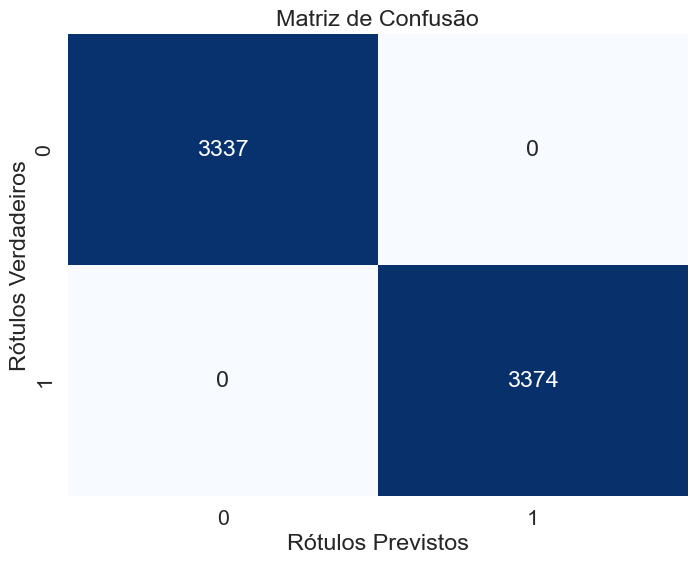

In [23]:
# Calcule a matriz de confusão
cm = confusion_matrix(Y_test, predictions)

# Crie uma figura e um eixo para o plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajusta o tamanho da fonte

# Use o seaborn para criar um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Configuração de rótulos e títulos
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

In [24]:
report = classification_report(Y_test, predictions, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2) 
df_report

,precision,recall,f1-score,support
1.0,1.0,1.0,1.0,3337.0
2.0,1.0,1.0,1.0,3374.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,6711.0
weighted avg,1.0,1.0,1.0,6711.0


In [25]:
probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc_score(Y_test, probs)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

ValueError: y_true takes value in {1.0, 2.0} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Curva Precision-Recall (AUC = {:.2f})'.format(average_precision_score(Y_test, probs)))
plt.xlabel('Revocação (Recall)')
plt.ylabel('Precisão')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.show()